In [1]:
import torch
from torch.utils import data
from PIL import Image   #  pip install pillow
import numpy as np
from torchvision import transforms

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import glob

In [4]:
all_imgs_path = glob.glob(r'D:\163\tch\jk\20201115\dataset\dataset2\*.jpg')

In [5]:
all_imgs_path[:3]

['D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\cloudy1.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\cloudy10.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\cloudy100.jpg']

In [6]:
species = ['cloudy', 'rain', 'shine', 'sunrise']

In [7]:
species_to_idx = dict((c, i) for i, c in enumerate(species))

In [8]:
species_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [9]:
idx_to_species = dict((v, k) for k, v in species_to_idx.items())

In [10]:
idx_to_species

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}

In [11]:
all_labels = []

for img in all_imgs_path:
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)

In [14]:
all_labels[-5:]

[3, 3, 3, 3, 3]

In [15]:
all_imgs_path[-5:]

['D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\sunrise95.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\sunrise96.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\sunrise97.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\sunrise98.jpg',
 'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\sunrise99.jpg']

In [28]:
index = np.random.permutation(len(all_imgs_path))

In [29]:
index

array([503, 442, 684, ..., 670, 371, 379])

In [30]:
all_imgs_path = np.array(all_imgs_path)[index]

In [31]:
all_imgs_path[:5]

array(['D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\rain90.jpg',
       'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\rain35.jpg',
       'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\shine253.jpg',
       'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\rain42.jpg',
       'D:\\163\\tch\\jk\\20201115\\dataset\\dataset2\\rain194.jpg'],
      dtype='<U54')

In [32]:
all_labels = np.array(all_labels)[index]

In [33]:
all_labels[:5]

array([1, 1, 2, 1, 1])

In [34]:
s = int(len(all_imgs_path)*0.8)

In [35]:
s

897

In [36]:
train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

In [16]:
transform = transforms.Compose([
                    transforms.Resize((96, 96)),
                    transforms.ToTensor(),
])

In [17]:
class Mydataset(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
        
    def __getitem__(self, index):
        img = self.imgs[index]
        label = self.labels[index]
        
        pil_img = Image.open(img)
        pil_img = pil_img.convert("RGB")    # 可选,建议都使用
        data = self.transforms(pil_img)
        
        return data, label
    
    def __len__(self):
        return len(self.imgs)

In [18]:
wheather_dataset = Mydataset(all_imgs_path, all_labels, transform)

In [19]:
type(wheather_dataset)

__main__.Mydataset

In [21]:
BATCH_SIZE = 16

In [22]:
wheather_dl = data.DataLoader(
                      wheather_dataset,
                      batch_size=BATCH_SIZE,
                      shuffle=True,
)

In [23]:
imgs_batch, labels_batch = next(iter(wheather_dl))

In [24]:
imgs_batch.shape

torch.Size([16, 3, 96, 96])

In [25]:
labels_batch.shape

torch.Size([16])

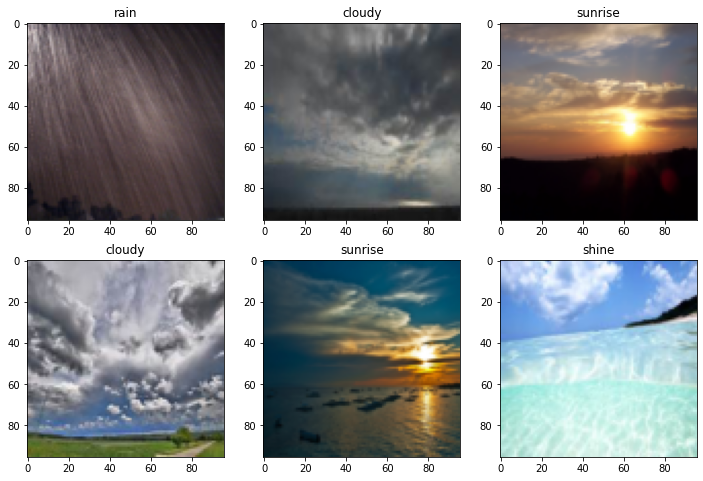

In [27]:
plt.figure(figsize=(12, 8))

for i, (img, label) in enumerate(zip(imgs_batch[-6:], labels_batch[-6:])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(idx_to_species.get(label.item()))
    plt.imshow(img)

In [37]:
train_ds = Mydataset(train_imgs, train_labels, transform)

In [38]:
test_ds = Mydataset(test_imgs, test_labels, transform)

In [39]:
train_dl = data.DataLoader(train_ds,
                           batch_size=16,
                           shuffle=True)

In [40]:
test_dl = data.DataLoader(test_ds,
                           batch_size=16)

In [44]:
imgs, labels = next(iter(train_dl))

In [45]:
imgs.shape

torch.Size([16, 3, 96, 96])

In [47]:
class New_dataset(data.Dataset):
    def __init__(self, some_dataset):
        self.ds = some_dataset
    def __getitem__(self, index):
        img, label = self.ds[index]
        img = img.permute(1, 2, 0)
        return img, label
    def __len__(self):
        return len(self.ds)

In [48]:
train_new_dataset = New_dataset(train_ds)

In [49]:
img, label = train_new_dataset[2]

In [50]:
img.shape

torch.Size([96, 96, 3])